# **Диагностическая работа №4. Библиотека Pandas**

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Задание №1**


Рассчитайте процент выживших пассажиров в зависимости от класса (Pclass). Представьте результат в виде таблицы с колонками "Pclass" и "Survival Rate (%)". Какой класс имел самый высокий шанс выживания?


In [ ]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_by_class = survival_by_class.reset_index()
survival_by_class.columns = ['Pclass', 'Survival Rate (%)']

print(survival_by_class)
highest_class = survival_by_class.loc[survival_by_class['Survival Rate (%)'].idxmax()]['Pclass']
print(f"\nСамый высокий шанс выживания у класса: {highest_class}")

   Pclass  Survival Rate (%)
0       1          62.962963
1       2          47.282609
2       3          24.236253

Самый высокий шанс выживания у класса: 1.0


## **Задание №2**


Создайте новую колонку "Fare_Category", разделив пассажиров на категории по стоимости билета: "Budget" (до 20), "Economy" (20-50), "Premium" (50-100) и "Luxury" (более 100). Посчитайте количество пассажиров и процент выживших в каждой категории.


In [ ]:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[-1, 20, 50, 100, float('inf')],
                             labels=['Budget', 'Economy', 'Premium', 'Luxury'])

grouped = df.groupby('Fare_Category').agg(
    Count=('PassengerId', 'count'),
    Survival_Rate=('Survived', lambda x: x.mean() * 100)
).reset_index()

print(grouped)

  Fare_Category  Count  Survival_Rate
0        Budget    515      27.766990
1       Economy    216      41.666667
2       Premium    107      65.420561
3        Luxury     53      73.584906


<ipython-input-4-f291e0db7d3a>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Fare_Category').agg(


## **Задание №3**


Постройте столбчатую диаграмму (bar chart), показывающую распределение пассажиров по портам посадки (Embarked). Добавьте на график процент выживших для каждого порта, используя второстепенную ось.

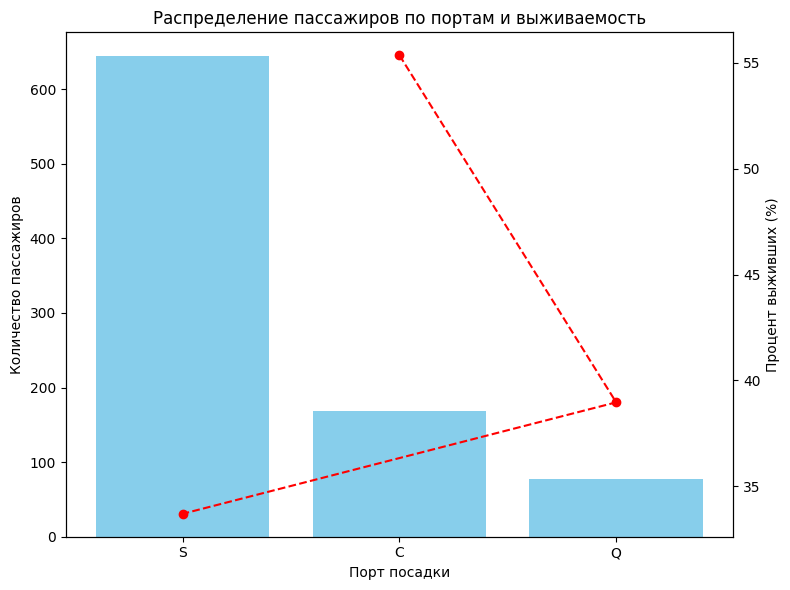

In [ ]:
import matplotlib.pyplot as plt

embarked_counts = df['Embarked'].value_counts()
embarked_survival = df.groupby('Embarked')['Survived'].mean() * 100

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(embarked_counts.index, embarked_counts.values, color='skyblue', label='Количество')
ax1.set_xlabel('Порт посадки')
ax1.set_ylabel('Количество пассажиров')

ax2 = ax1.twinx()
ax2.plot(embarked_survival.index, embarked_survival.values, color='red', marker='o', linestyle='--', label='Выживаемость (%)')
ax2.set_ylabel('Процент выживших (%)')

plt.title('Распределение пассажиров по портам и выживаемость')
fig.tight_layout()
plt.show()

## **Задание №4**


Проанализируйте связь между размером семьи (создайте колонку "Family_Size" = SibSp + Parch + 1) и вероятностью выживания. Сформулируйте вывод о том, как размер семьи мог влиять на шанс спасения.

In [ ]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

family_survival = df.groupby('Family_Size')['Survived'].mean() * 100
family_survival = family_survival.reset_index()
family_survival.columns = ['Family_Size', 'Survival Rate (%)']

print(family_survival)

print("\nВывод: Пассажиры с небольшими семьями имели более высокий шанс выжить.")
print("Очень большие и очень маленькие семьи показали меньшую выживаемость.")

   Family_Size  Survival Rate (%)
0            1          30.353818
1            2          55.279503
2            3          57.843137
3            4          72.413793
4            5          20.000000
5            6          13.636364
6            7          33.333333
7            8           0.000000
8           11           0.000000

Вывод: Пассажиры с небольшими семьями имели более высокий шанс выжить.
Очень большие и очень маленькие семьи показали меньшую выживаемость.


## **Задание №5**


Заполните пропуски в колонке "Cabin" значением "Unknown". Затем создайте новую колонку "Deck", которая будет содержать только первую букву каюты (обозначение палубы). Проанализируйте выживаемость по разным палубам и постройте соответствующую визуализацию.

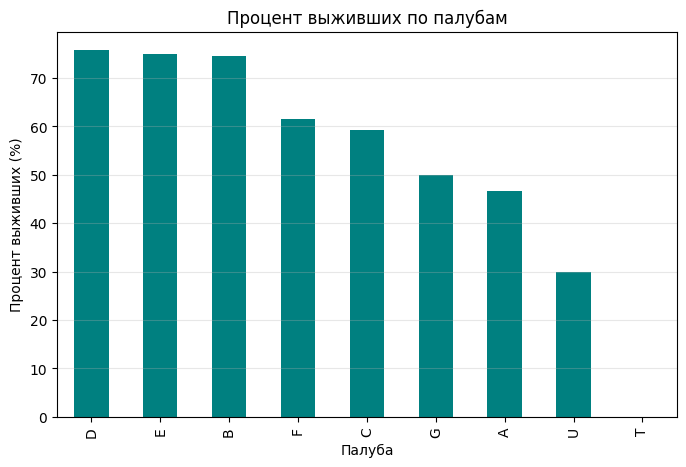

In [ ]:

df['Cabin'] = df['Cabin'].fillna('Unknown')

df['Deck'] = df['Cabin'].str[0]

deck_survival = df[df['Deck'] != 'n'].groupby('Deck')['Survived'].mean().sort_values(ascending=False) * 100

deck_survival.plot(kind='bar', figsize=(8, 5), color='teal', title='Процент выживших по палубам')
plt.xlabel('Палуба')
plt.ylabel('Процент выживших (%)')
plt.grid(axis='y', alpha=0.3)
plt.show()